In [70]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
df = pd.read_csv("housing_data.csv")
df.head(5)

,Area (sqft),Bedrooms,Bathrooms,Floors,Age (years),Price
0,1460,3,2,2,18,412068.797264
1,1894,3,1,1,19,515651.827526
2,1730,3,1,3,6,500103.801411
3,1695,1,1,2,19,440535.510001
4,2238,4,1,3,8,630995.763451


In [72]:
df.isnull().sum()


Area (sqft)    0
Bedrooms       0
Bathrooms      0
Floors         0
Age (years)    0
Price          0
dtype: int64

In [73]:
input = df.drop(columns="Price")
input
output = df["Price"]
output

0     412068.797264
1     515651.827526
2     500103.801411
3     440535.510001
4     630995.763451
          ...      
95    527420.561035
96    485508.534219
97    720161.829538
98    823349.822514
99    593954.315166
Name: Price, Length: 100, dtype: float64

In [74]:
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2)

In [75]:
x_train

,Area (sqft),Bedrooms,Bathrooms,Floors,Age (years)
37,1867,2,2,1,22
65,1729,3,2,3,24
16,3453,1,2,1,22
34,3334,3,2,1,4
33,789,1,1,3,11
...,...,...,...,...,...
57,3156,3,1,1,7
42,3488,3,1,3,15
5,2769,3,2,3,0
46,1200,3,1,2,23


In [76]:
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

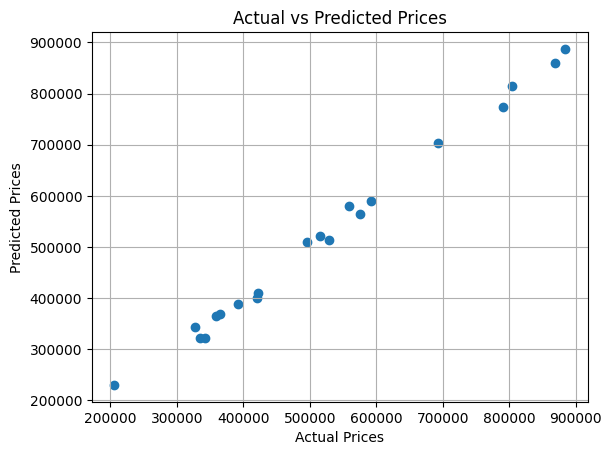

In [77]:
import matplotlib.pyplot as plt

y_pred = lr.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


In [78]:
print("Accuracy :", lr.score(x_test,y_test)*100)

Accuracy : 99.50954329923991


Improving the model using Standard Scaler

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(input)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, output, test_size=0.2)


In [82]:
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [83]:
print("Accuracy :", lr.score(x_test,y_test)*100)

Accuracy : 99.59884434080037


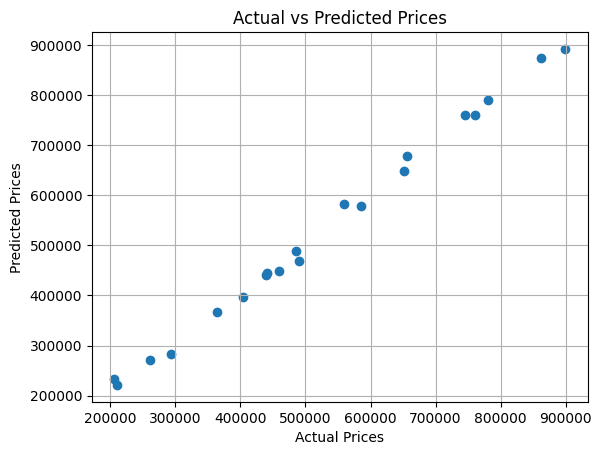

In [84]:
import matplotlib.pyplot as plt

y_pred = lr.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(f"{name} R² Score: {model.score(x_test, y_test):.4f}")


Linear Regression R² Score: 0.9960
Decision Tree R² Score: 0.9780
Random Forest R² Score: 0.9885
